In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
goes = pd.read_csv('../Data/merged_goes_f16t18_data.csv', dtype={'status': str})
goes.sort_values(by=['time'], inplace=True)
goes.head()

,time,xrsa_flux,xrsb_flux,telescope,status
0,2017-02-07 00:00:00,2.949822e-08,7.072423e-08,16,NaN
1,2017-02-07 00:01:00,2.716477e-08,6.869706e-08,16,NaN
2,2017-02-07 00:02:00,2.996076e-08,6.933664e-08,16,NaN
3,2017-02-07 00:03:00,3.124979e-08,6.796333e-08,16,NaN
4,2017-02-07 00:04:00,3.095799e-08,6.928261e-08,16,NaN


In [6]:
print(
    goes.info(),
    goes['status'].value_counts(),
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493175 entries, 0 to 6493120
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   time       object 
 1   xrsa_flux  float64
 2   xrsb_flux  float64
 3   telescope  int64  
 4   status     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 297.2+ MB
None EVENT_START    16938
EVENT_PEAK     16875
EVENT_END      14703
POST_EVENT     10569
Name: status, dtype: int64


In [7]:
# max and min time
print(goes['time'].min(), goes['time'].max())

2017-02-07 00:00:00 2023-10-02 23:59:00


* Data from goes18 specifies end date of 2023-10-08 but the merged data shows max date of 2023-10-02

In [8]:
goes[['xrsa_flux', 'xrsb_flux']].describe()

,xrsa_flux,xrsb_flux
count,6.025070e+06,6.025062e+06
mean,4.376958e-08,6.536313e-07
std,1.221524e-06,4.055643e-06
min,1.000000e-09,1.000000e-09
25%,3.573186e-09,1.147511e-08
50%,7.540947e-09,7.125610e-08
75%,1.644478e-08,6.961812e-07
max,6.020046e-04,1.466276e-03


In [9]:
# flux summary by status
goes.groupby('status')[['xrsa_flux', 'xrsb_flux']].describe()

xrsa_flux                                                          \
                count          mean           std           min           25%   
status                                                                          
EVENT_END     14688.0  1.727202e-07  2.240586e-06  1.000000e-09  1.182867e-08   
EVENT_PEAK    16860.0  5.557165e-07  6.470749e-06  1.000000e-09  2.581357e-08   
EVENT_START   16923.0  4.583051e-08  1.526882e-07  1.000000e-09  7.910819e-09   
POST_EVENT    10560.0  4.317285e-08  1.505624e-07  1.000000e-09  7.581564e-09   

                                                  xrsb_flux            \
                      50%           75%       max     count      mean   
status                                                                  
EVENT_END    3.035228e-08  8.419233e-08  0.000215   14688.0  0.000002   
EVENT_PEAK   8.150119e-08  2.563656e-07  0.000595   16860.0  0.000004   
EVENT_START  1.609500e-08  3.674041e-08  0.000005   16923.0  0.000001   
POST_EVENT   1.495836e-08  3.471641e-08  0.000005   10560.0  0.000001   

                                                                           \
                  std           min           25%           50%       75%   
status                                                                      
EVENT_END    0.000009  1.013100e-08  3.371104e-07  1.080726e-06  0.000002   
EVENT_PEAK   0.000018  9.517953e-08  4.837057e-07  1.536344e-06  0.000003   
EVENT_START  0.000002  1.000000e-09  2.216962e-07  7.413963e-07  0.000001   
POST_EVENT   0.000002  5.677754e-09  2.199556e-07  7.477591e-07  0.000002   

                       
                  max  
status                 
EVENT_END    0.000633  
EVENT_PEAK   0.001466  
EVENT_START  0.000033  
POST_EVENT   0.000048

In [11]:
declared_flares = goes[goes['status'].notnull()]
declared_flares.head(8)

,time,xrsa_flux,xrsb_flux,telescope,status
2921,2017-02-09 00:41:00,2.711966e-08,1.114654e-07,16,EVENT_START
2930,2017-02-09 00:50:00,4.325080e-08,3.800934e-07,16,EVENT_PEAK
2937,2017-02-09 00:57:00,3.119617e-08,2.325111e-07,16,EVENT_END
2953,2017-02-09 01:13:00,2.622410e-08,1.151511e-07,16,POST_EVENT
2970,2017-02-09 01:30:00,2.176940e-08,9.893294e-08,16,EVENT_START
2980,2017-02-09 01:40:00,5.358257e-08,4.395089e-07,16,EVENT_PEAK
2984,2017-02-09 01:44:00,1.958162e-08,1.483600e-07,16,EVENT_END
2985,2017-02-09 01:45:00,1.832175e-08,1.317124e-07,16,EVENT_START


In [13]:
declared_flares['status'].value_counts()

EVENT_START    16938
EVENT_PEAK     16875
EVENT_END      14703
POST_EVENT     10569
Name: status, dtype: int64

In [12]:
'''  
some events do not contain post marker - remove posts,
each event shows different counts
'''
declared_no_post = declared_flares[declared_flares['status'] != 'POST_EVENT']
declared_no_post.head(9)

,time,xrsa_flux,xrsb_flux,telescope,status
2921,2017-02-09 00:41:00,2.711966e-08,1.114654e-07,16,EVENT_START
2930,2017-02-09 00:50:00,4.325080e-08,3.800934e-07,16,EVENT_PEAK
2937,2017-02-09 00:57:00,3.119617e-08,2.325111e-07,16,EVENT_END
2970,2017-02-09 01:30:00,2.176940e-08,9.893294e-08,16,EVENT_START
2980,2017-02-09 01:40:00,5.358257e-08,4.395089e-07,16,EVENT_PEAK
2984,2017-02-09 01:44:00,1.958162e-08,1.483600e-07,16,EVENT_END
2985,2017-02-09 01:45:00,1.832175e-08,1.317124e-07,16,EVENT_START
2991,2017-02-09 01:51:00,2.309628e-07,1.702064e-06,16,EVENT_PEAK
2996,2017-02-09 01:56:00,5.701078e-08,7.596219e-07,16,EVENT_END


In [14]:
declared_no_post['status'].value_counts()

EVENT_START    16938
EVENT_PEAK     16875
EVENT_END      14703
Name: status, dtype: int64

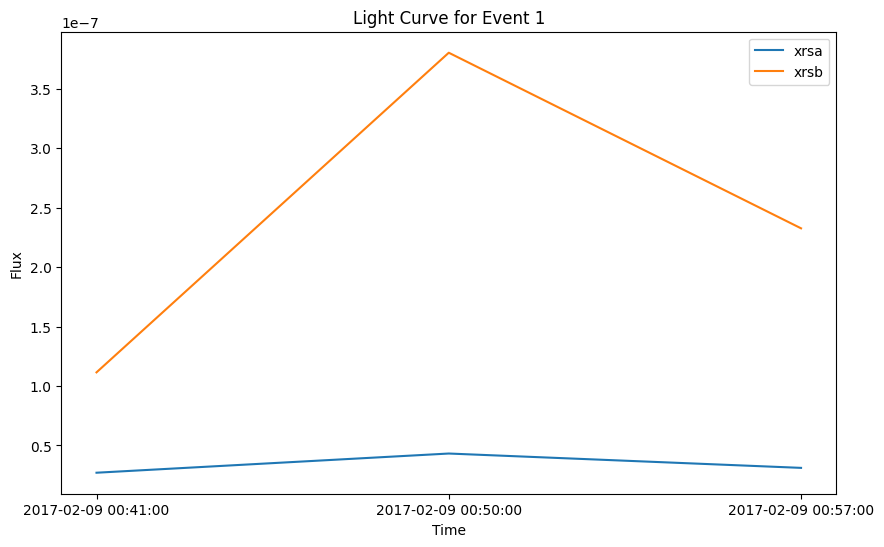

In [15]:
# first event based on status markers
event1 = declared_no_post.iloc[0:3]
plt.figure(figsize=(10, 6))
plt.plot(event1['time'], event1['xrsa_flux'])
plt.plot(event1['time'], event1['xrsb_flux'])
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Light Curve for Event 1')
plt.legend(['xrsa', 'xrsb'])
#plt.savefig('EventSample.png')
plt.show()

In [17]:
# get duration of each event in seconds
event_durations = []
for i in range(1):
    event = declared_no_post.iloc[i]
    print(event)

time         2017-02-09 00:41:00
xrsa_flux                    0.0
xrsb_flux                    0.0
telescope                     16
status               EVENT_START
Name: 2921, dtype: object


In [18]:
event_durations = []
for i in range(len(declared_no_post)):
    event = declared_no_post.iloc[i]
    if event['status'] == 'EVENT_START':
        start_time = pd.to_datetime(event['time'])
    elif event['status'] == 'EVENT_END':
        end_time = pd.to_datetime(event['time'])
        duration = (end_time - start_time).total_seconds()
        event_durations.append(duration)
        
event_durations

[960.0,
 840.0,
 660.0,
 1080.0,
 780.0,
 540.0,
 1440.0,
 780.0,
 720.0,
 900.0,
 1020.0,
 720.0,
 720.0,
 720.0,
 720.0,
 840.0,
 960.0,
 840.0,
 960.0,
 900.0,
 480.0,
 660.0,
 1860.0,
 1080.0,
 1980.0,
 600.0,
 720.0,
 1140.0,
 480.0,
 2040.0,
 660.0,
 1020.0,
 660.0,
 660.0,
 1260.0,
 1260.0,
 840.0,
 660.0,
 1860.0,
 660.0,
 2460.0,
 960.0,
 480.0,
 1140.0,
 720.0,
 540.0,
 1140.0,
 1020.0,
 2160.0,
 1800.0,
 540.0,
 2820.0,
 780.0,
 480.0,
 900.0,
 780.0,
 1020.0,
 780.0,
 1140.0,
 600.0,
 1200.0,
 840.0,
 660.0,
 780.0,
 2220.0,
 660.0,
 840.0,
 840.0,
 1440.0,
 540.0,
 660.0,
 1740.0,
 720.0,
 1620.0,
 1200.0,
 2520.0,
 1680.0,
 780.0,
 720.0,
 540.0,
 1020.0,
 2160.0,
 1320.0,
 780.0,
 1620.0,
 600.0,
 600.0,
 1560.0,
 2580.0,
 540.0,
 600.0,
 660.0,
 1740.0,
 960.0,
 1200.0,
 780.0,
 540.0,
 780.0,
 1020.0,
 900.0,
 600.0,
 1260.0,
 780.0,
 1440.0,
 1320.0,
 660.0,
 1140.0,
 900.0,
 1860.0,
 720.0,
 1200.0,
 600.0,
 1260.0,
 1020.0,
 1260.0,
 600.0,
 780.0,
 1260.0,
 720.0,


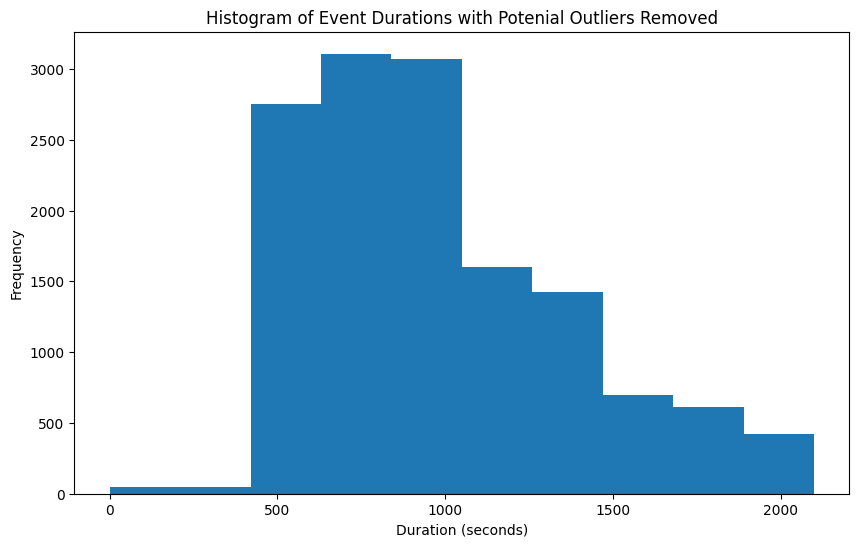

In [19]:
# Histogram of event durations with potential outliers removed
event_durations = pd.Series(event_durations)
IQR = event_durations.quantile(0.75) - event_durations.quantile(0.25)
lwr = event_durations.quantile(0.25) - 1.5*IQR
upr = event_durations.quantile(0.75) + 1.5*IQR
durations = event_durations[(event_durations > lwr) & (event_durations < upr)]

plt.figure(figsize=(10, 6))
plt.hist(durations)
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Event Durations with Potenial Outliers Removed')
#plt.savefig('EventDurations.png')
plt.show()

In [20]:
# get peak fluxes
xrsa_peaks = goes[goes['status'] == 'EVENT_PEAK']['xrsa_flux']
xrsa_peaks = pd.Series(xrsa_peaks)
xrsa_peaks.head()

xrsb_peaks = goes[goes['status'] == 'EVENT_PEAK']['xrsb_flux']
xrsb_peaks = pd.Series(xrsb_peaks)
xrsb_peaks.head()

IQRa = xrsa_peaks.quantile(0.75) - xrsa_peaks.quantile(0.25)
lwra = xrsa_peaks.quantile(0.25) - 1.5*IQRa
upra = xrsa_peaks.quantile(0.75) + 1.5*IQRa
xrsa_peaks_trimmed = xrsa_peaks[(xrsa_peaks > lwra) & (xrsa_peaks < upra)]

IQRb = xrsb_peaks.quantile(0.75) - xrsb_peaks.quantile(0.25)
lwrb = xrsb_peaks.quantile(0.25) - 1.5*IQRb
uprb = xrsa_peaks.quantile(0.75) + 1.5*IQRb
xrsb_peaks_trimmed = xrsb_peaks[(xrsb_peaks > lwrb) & (xrsb_peaks < uprb)]

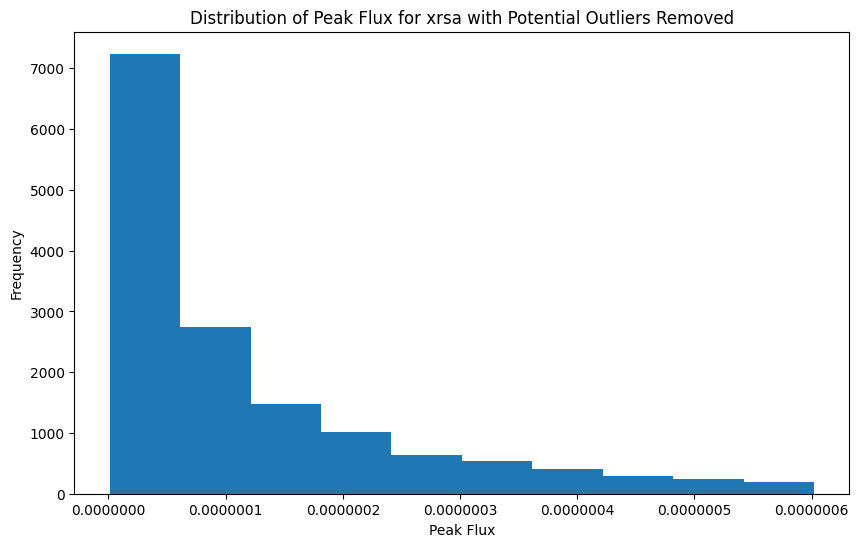

In [21]:
# distribution of each peak flux
plt.figure(figsize=(10, 6))
plt.hist(xrsa_peaks_trimmed)
plt.xlabel('Peak Flux')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Frequency')
plt.title('Distribution of Peak Flux for xrsa with Potential Outliers Removed')
#plt.savefig('PeakFluxXrsa.png')
plt.show()

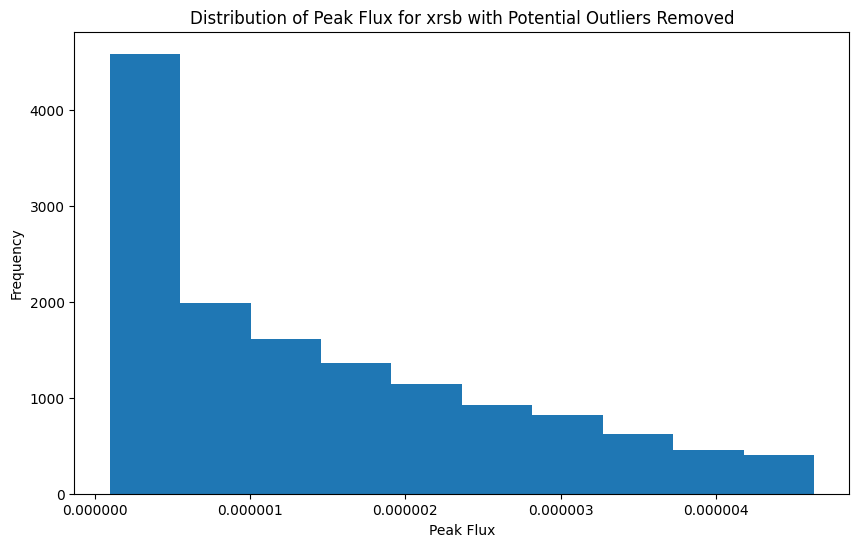

In [22]:
# distribution of each peak flux
plt.figure(figsize=(10, 6))
plt.hist(xrsb_peaks_trimmed)
plt.xlabel('Peak Flux')
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Frequency')
plt.title('Distribution of Peak Flux for xrsb with Potential Outliers Removed')
#plt.savefig('PeakFluxXrsb.png')
plt.show()

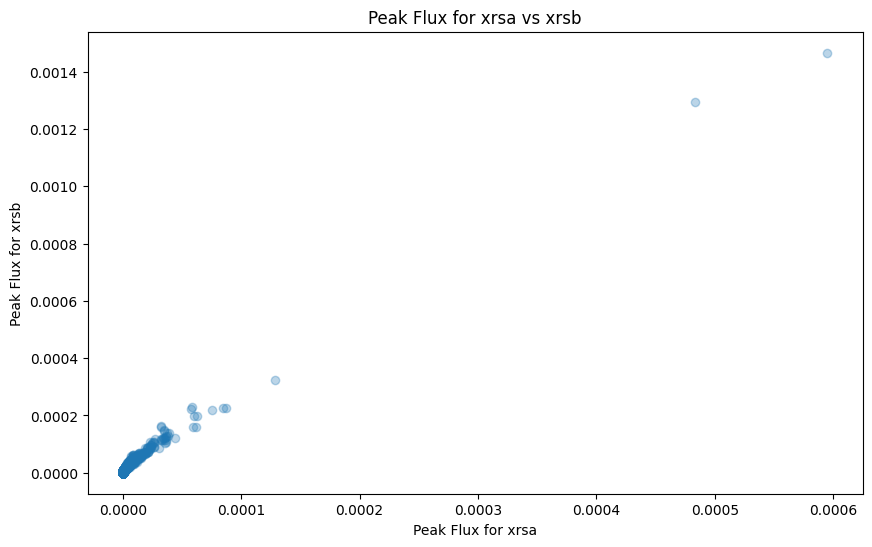

In [23]:
# scatterplot of xrsa vs xrsb peak fluxes
plt.figure(figsize=(10, 6))
alpha_value = 0.3
plt.scatter(xrsa_peaks, xrsb_peaks, alpha=alpha_value)
plt.xlabel('Peak Flux for xrsa')
plt.ylabel('Peak Flux for xrsb')
plt.title('Peak Flux for xrsa vs xrsb')
#plt.savefig('PeakFluxXrsaXrsb.png')
plt.show()

In [33]:
# duration between peak fluxes
peaks = declared_no_post[declared_no_post['status'] == 'EVENT_PEAK']
peaks['time'] = pd.to_datetime(peaks['time'])
time_between_peaks = peaks['time'].diff().dt.total_seconds()
time_between_peaks.head()

C:\Users\15639\AppData\Local\Temp\ipykernel_24788\3363319249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks['time'] = pd.to_datetime(peaks['time'])


2930       NaN
2980    3000.0
2991     660.0
3040    2940.0
3060    1140.0
Name: time, dtype: float64

In [35]:
time_between_peaks.describe()

count    1.687400e+04
mean     1.242609e+04
std      1.227622e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+03
75%      7.140000e+03
max      8.763240e+06
Name: time, dtype: float64

In [24]:
declared_no_post[declared_no_post['status'] == 'EVENT_PEAK'][['time', 'status']]

,time,status
2930,2017-02-09 00:50:00,EVENT_PEAK
2980,2017-02-09 01:40:00,EVENT_PEAK
2991,2017-02-09 01:51:00,EVENT_PEAK
3040,2017-02-09 02:40:00,EVENT_PEAK
3060,2017-02-09 02:59:00,EVENT_PEAK
...,...,...
6492639,2023-10-02 15:58:00,EVENT_PEAK
3497395,2023-10-02 16:35:00,EVENT_PEAK
6492676,2023-10-02 16:35:00,EVENT_PEAK
3497641,2023-10-02 20:41:00,EVENT_PEAK
